In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [17]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Class distribution in testing set')

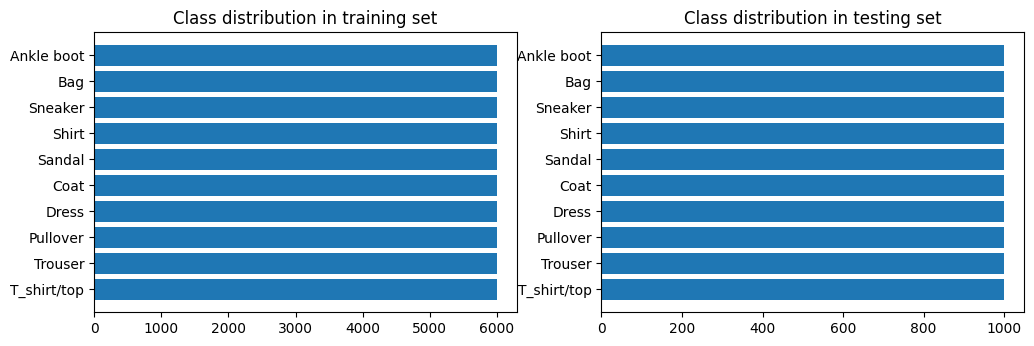

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

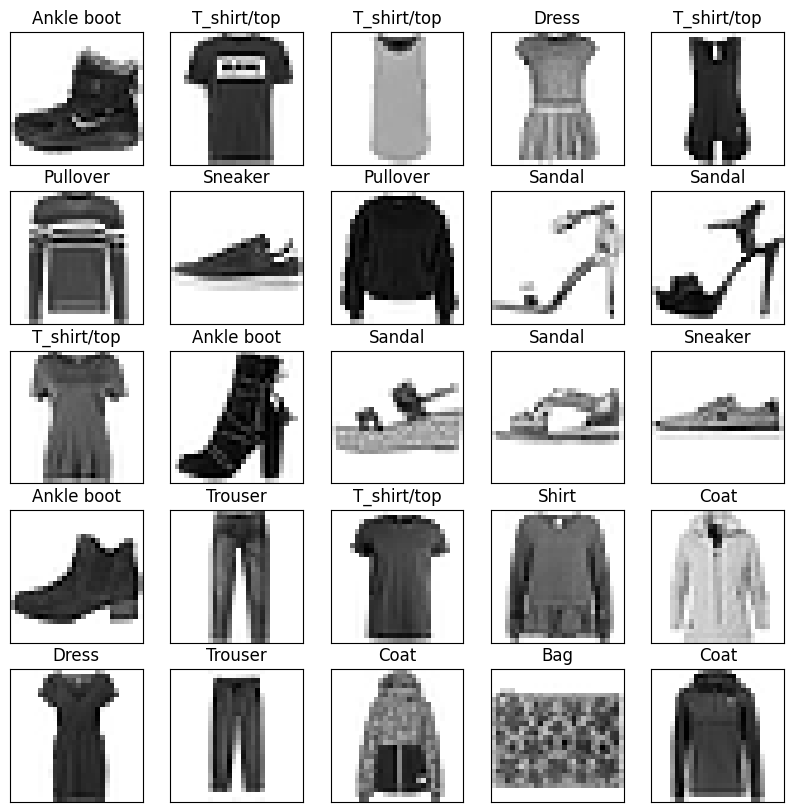

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.6936 - val_accuracy: 0.9169
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.6583 - val_accuracy: 0.9178
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.6231 - val_accuracy: 0.9160
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.7320 - val_accuracy: 0.9165
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.6497 - val_accuracy: 0.9144
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.6907 - val_accuracy: 0.9102
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.7698 - val_accuracy:

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.7447 - accuracy: 0.9122
Test accuracy: 0.9121999740600586


Text(0.5, 1.0, 'Accuracy evolution')

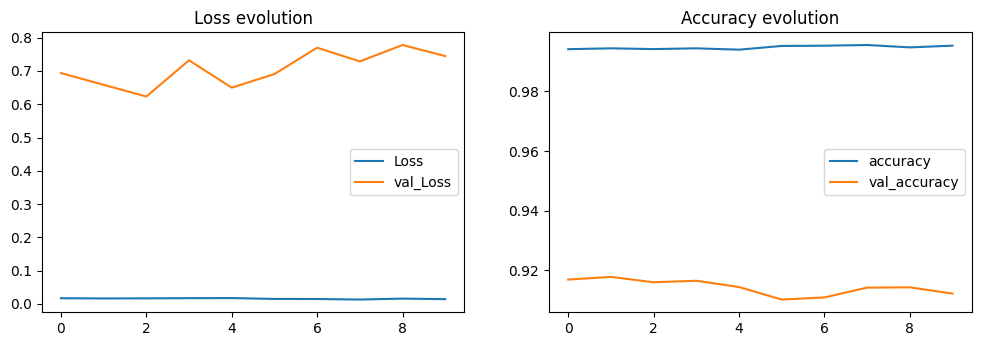

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [26]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 1s 2ms/step


In [28]:
test_img = x_test[0]
prediction = model.predict(x_test)
prediction[0]

313/313 [==============================] - 1s 2ms/step


array([3.2138594e-23, 5.0813801e-24, 6.0510769e-29, 9.1683159e-26,
       6.6259837e-30, 5.6733923e-21, 2.8058322e-30, 1.2856535e-21,
       1.1930662e-27, 1.0000000e+00], dtype=float32)

In [29]:
np.argmax(prediction[0])

9

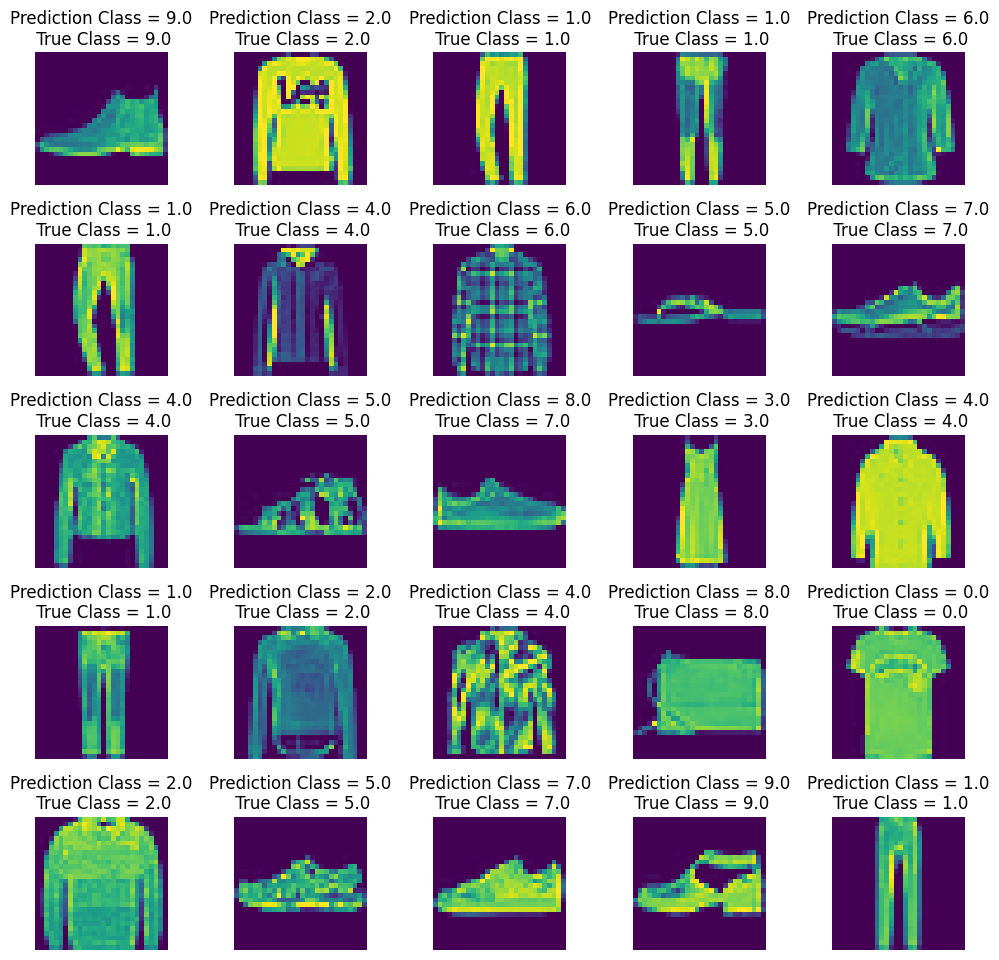

In [30]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

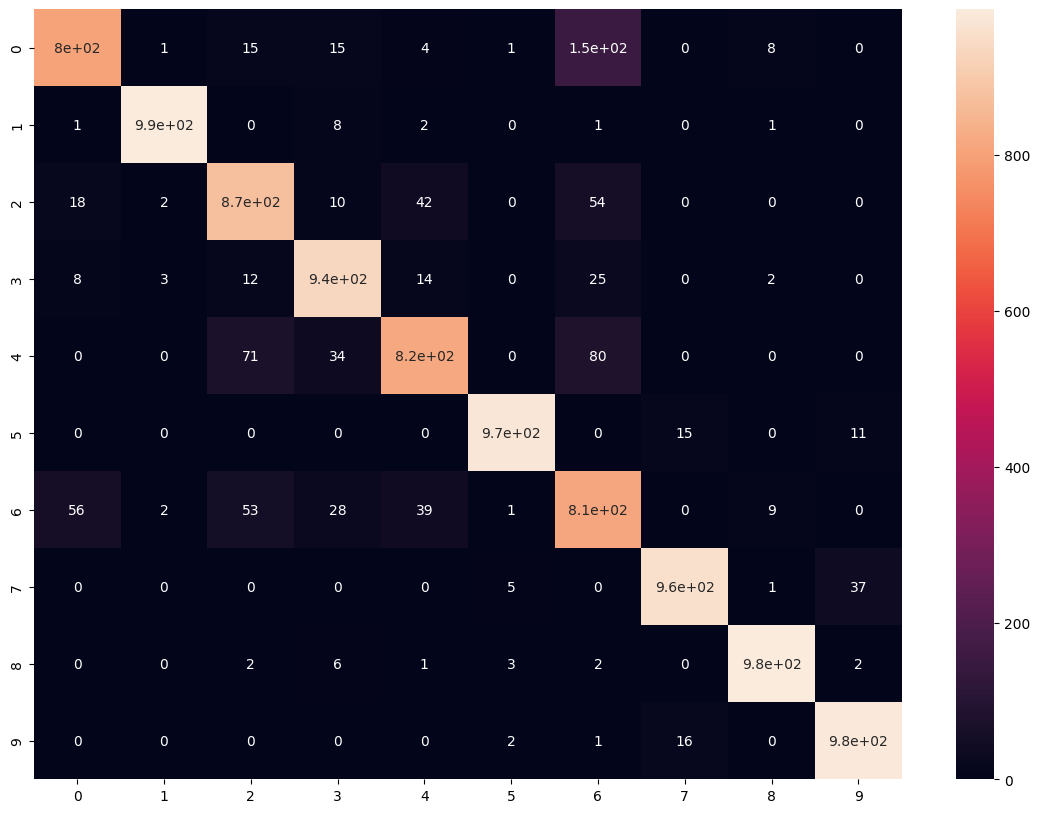

In [32]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)